In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_drug = pd.read_csv("H:\Hoc may y te\GitClone\ML-in-healthcare-project\Data set\drug200.csv")
df_drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [6]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df_drug['Age'].describe()

count    200.000000
mean      44.315000
std       16.544315
min       15.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64

In [8]:
df_drug['Na_to_K'].describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64



Sex
M    104
F     96
Name: count, dtype: int64


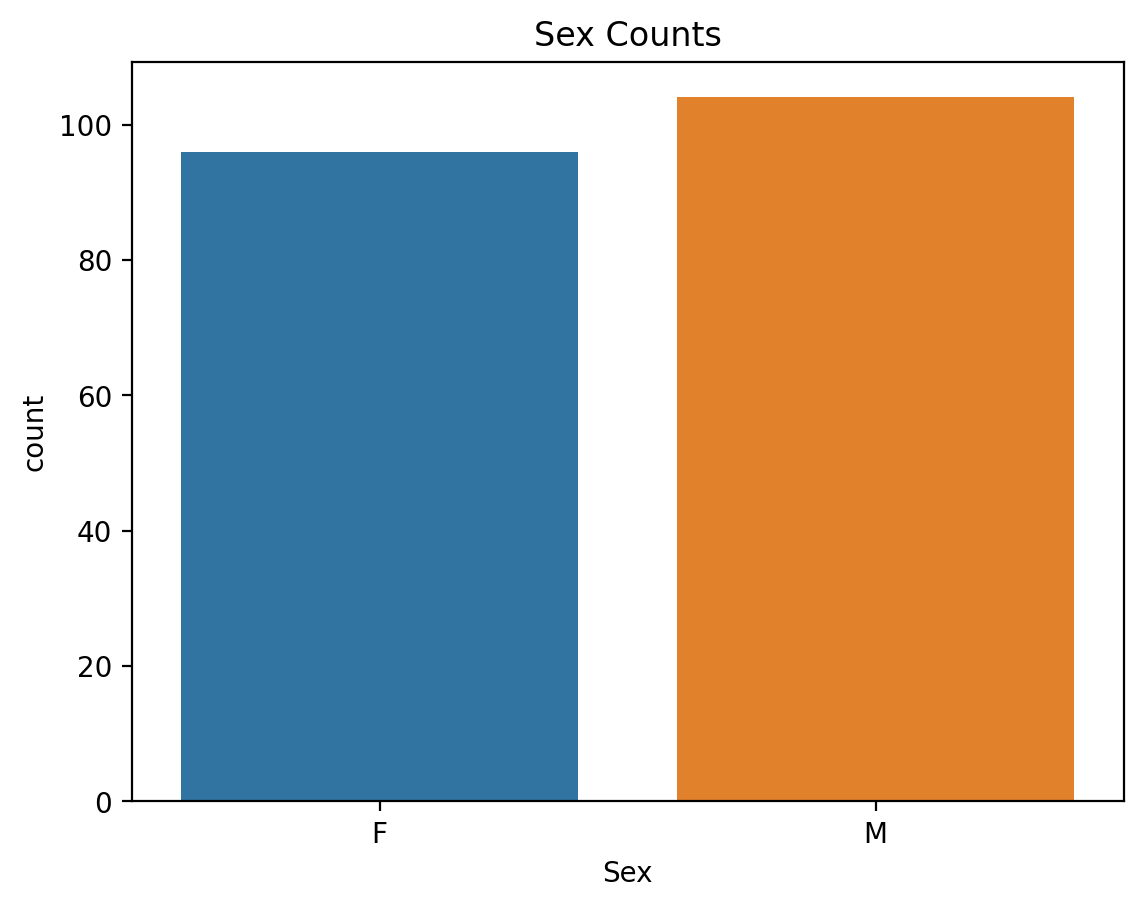



Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


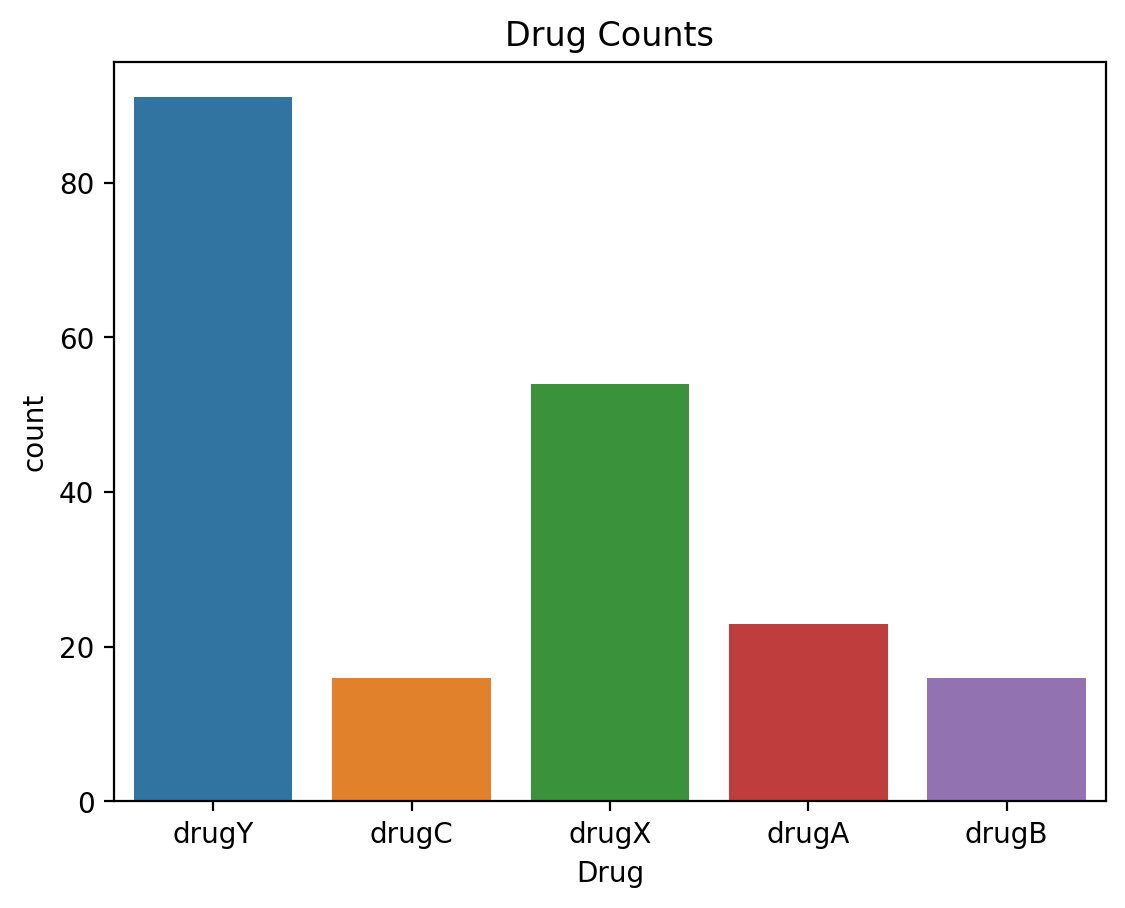



BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64


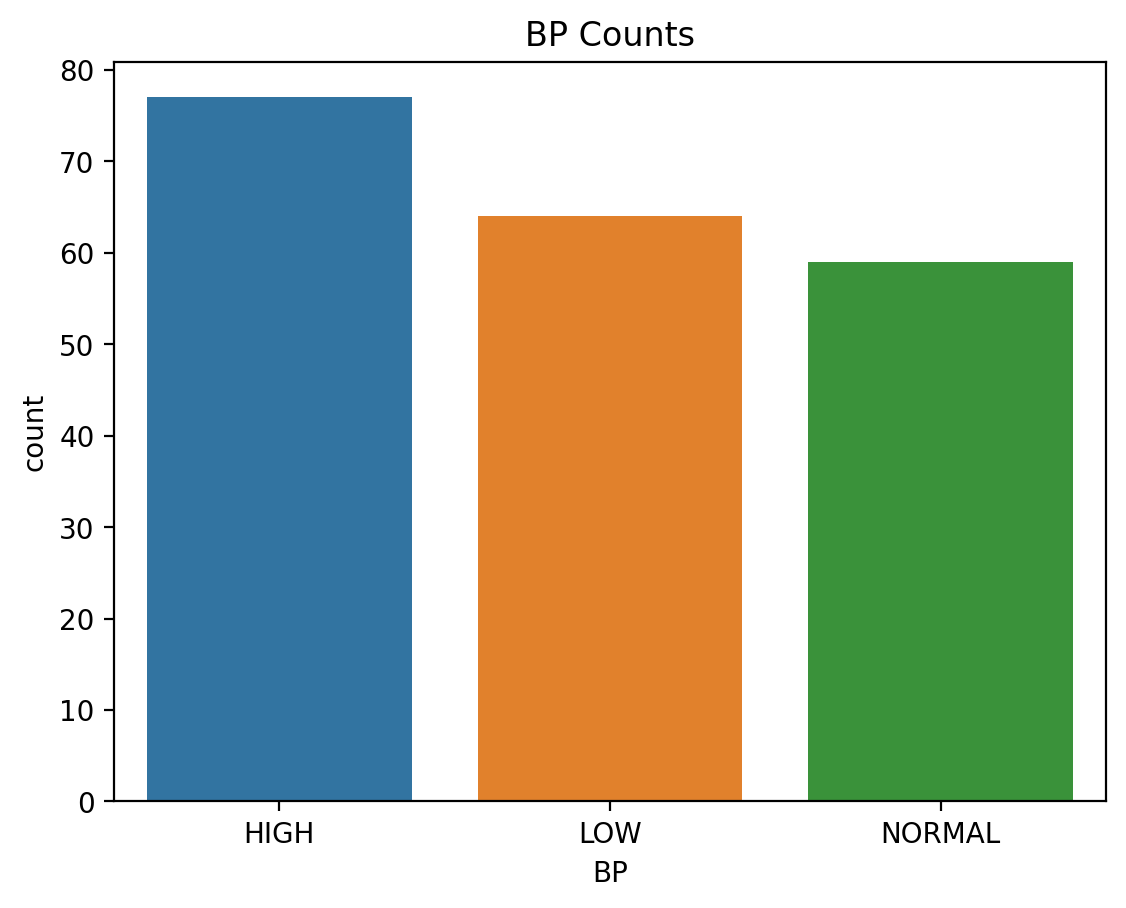



Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64


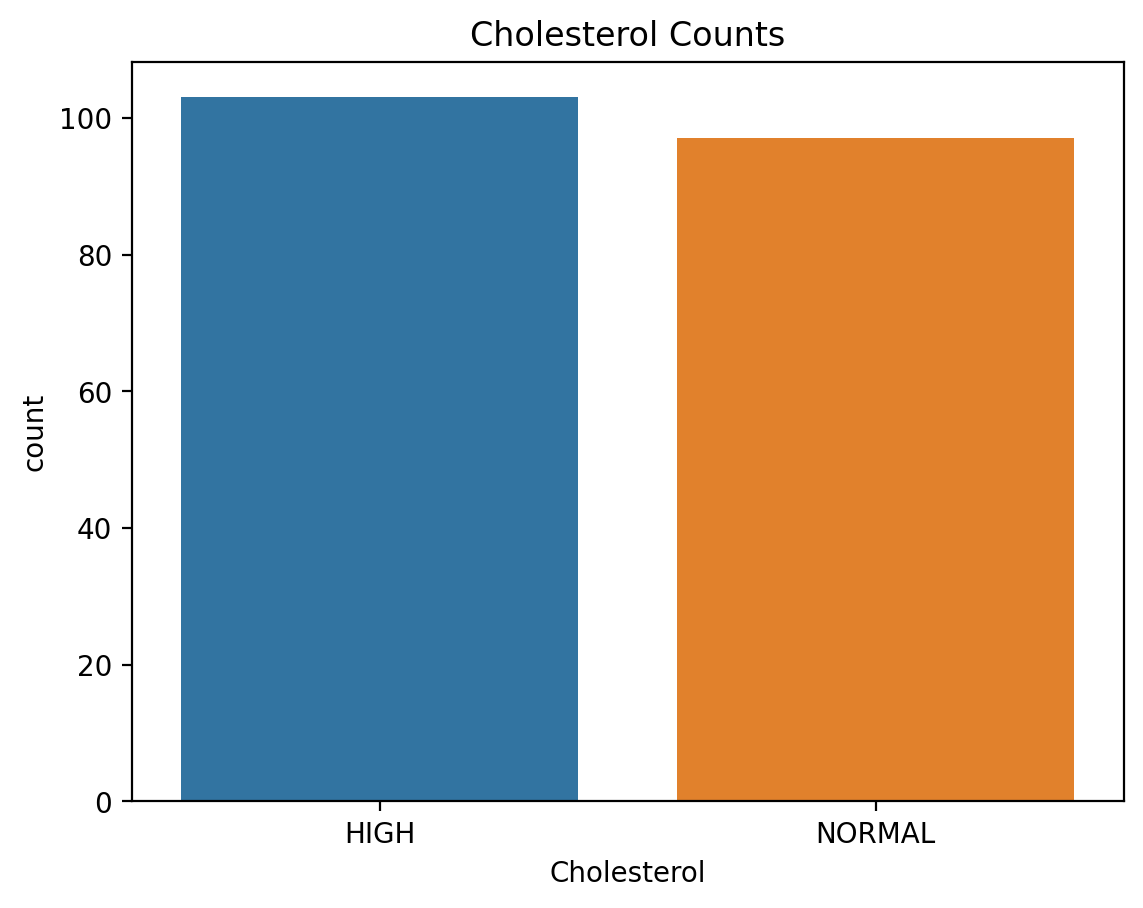

In [9]:
name_cols = ['Sex', 'Drug', 'BP', 'Cholesterol']
for name_col in name_cols:
    print("\n")
    plt.figure(dpi = 200)
    print(df_drug[name_col].value_counts())
    sns.countplot(x=df_drug[name_col])
    plt.title(str(name_col) + " Counts")
    plt.show()

# Basic Analysis



    Drug Sex  Count
0  drugA   F      9
1  drugA   M     14
2  drugB   F      6
3  drugB   M     10
4  drugC   F      7
5  drugC   M      9
6  drugX   F     27
7  drugX   M     27
8  drugY   F     47
9  drugY   M     44


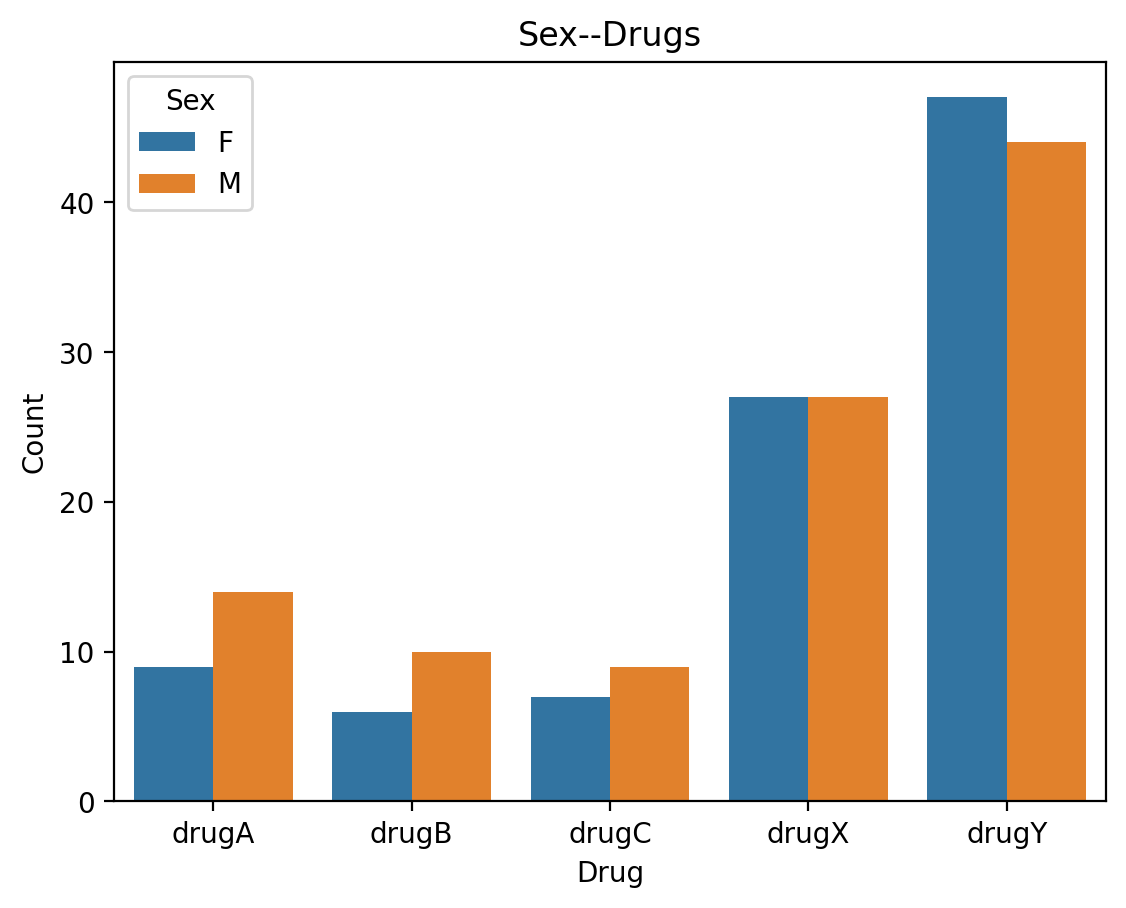



    Drug      BP  Count
0  drugA    HIGH     23
1  drugB    HIGH     16
2  drugC     LOW     16
3  drugX     LOW     18
4  drugX  NORMAL     36
5  drugY    HIGH     38
6  drugY     LOW     30
7  drugY  NORMAL     23


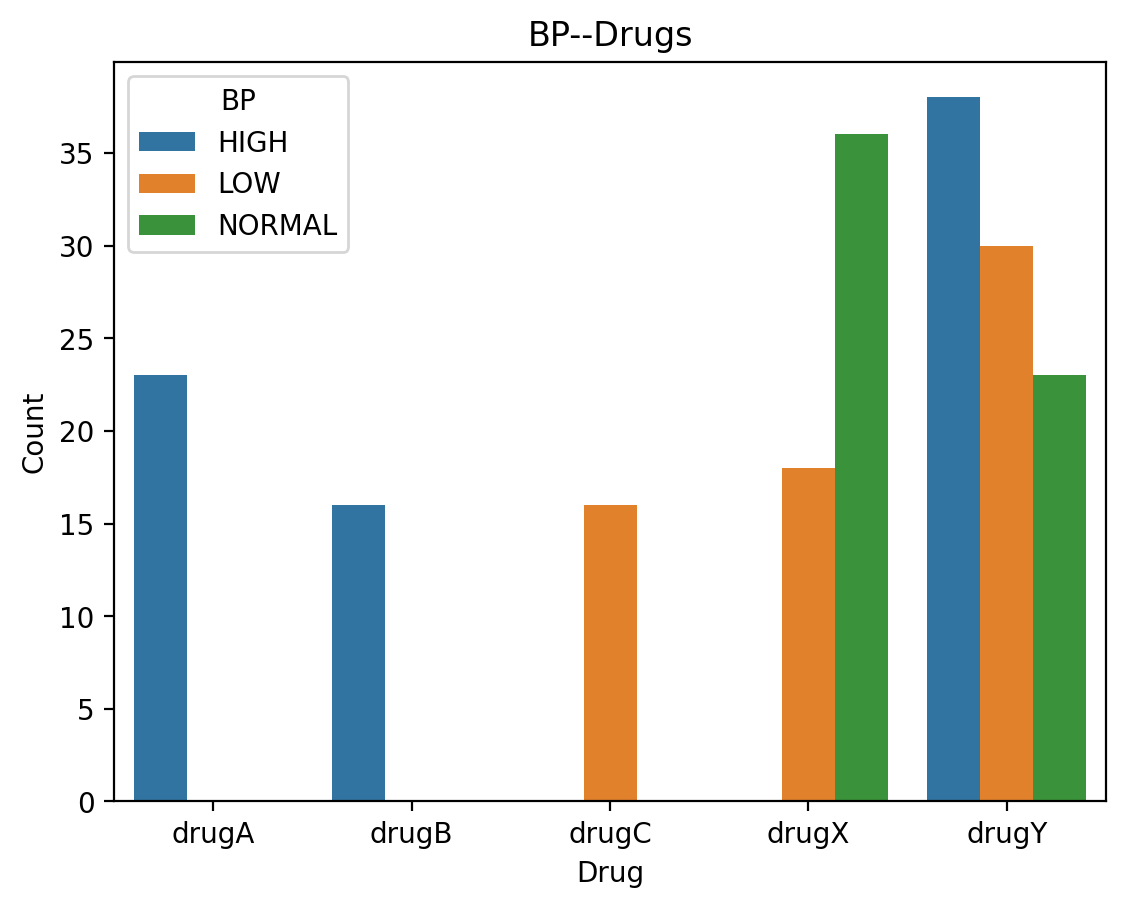



    Drug Cholesterol  Count
0  drugA        HIGH     12
1  drugA      NORMAL     11
2  drugB        HIGH      8
3  drugB      NORMAL      8
4  drugC        HIGH     16
5  drugX        HIGH     20
6  drugX      NORMAL     34
7  drugY        HIGH     47
8  drugY      NORMAL     44


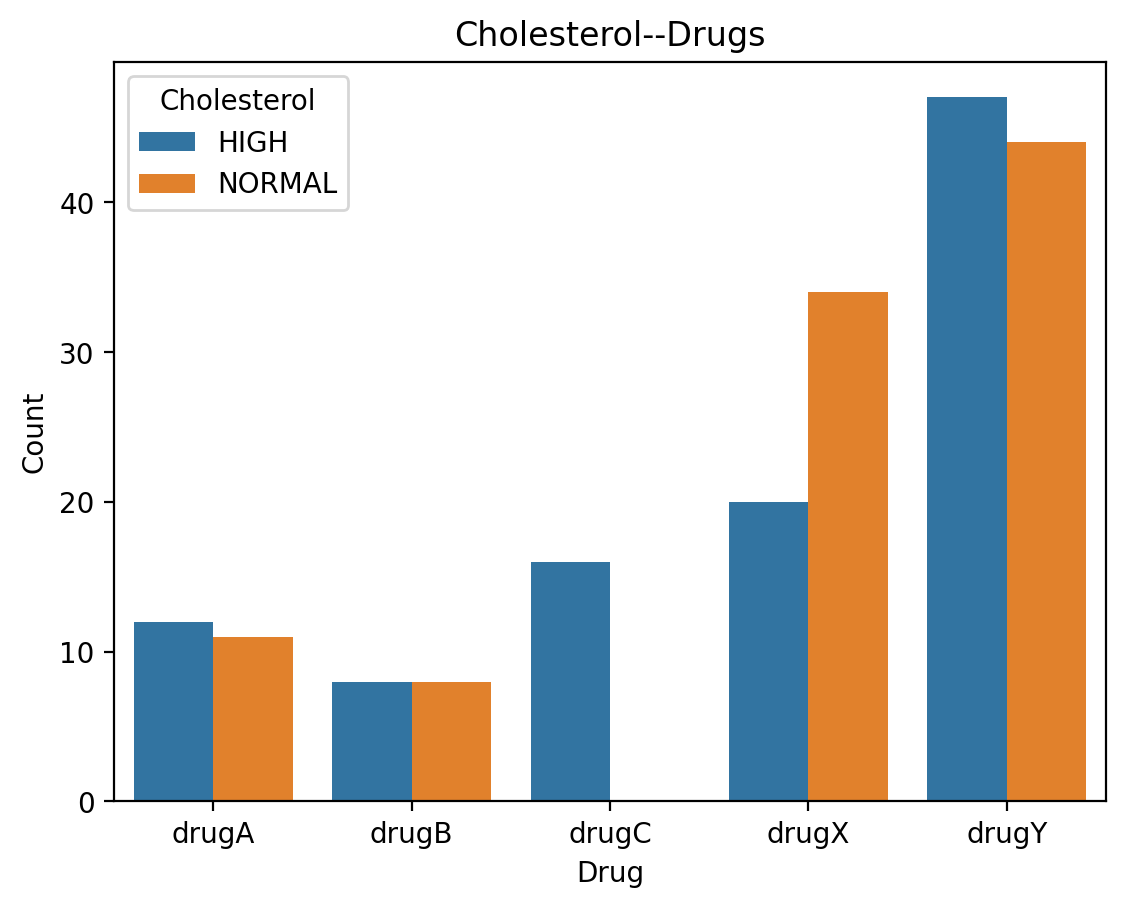

In [10]:
name_cols = ['Sex', 'BP', 'Cholesterol']
for name_col in name_cols:
    print("\n")
    plt.figure(dpi = 200)
    df_Dr = df_drug.groupby(['Drug', name_col]).size().reset_index(name = 'Count')
    print(df_Dr)
    sns.barplot(x="Drug", y = "Count", hue = name_col, data = df_Dr)
    plt.title(str(name_col)+"--Drugs")
    plt.show()

* drugA and drugB are got only by people who have HIGH blood pressure.
* drugC is got by people who have LOW blood pressure.
* drugX is got by people who have HIGH blood pressure.
* BP is an important feature for classification.

<Axes: xlabel='Drug', ylabel='Na_to_K'>

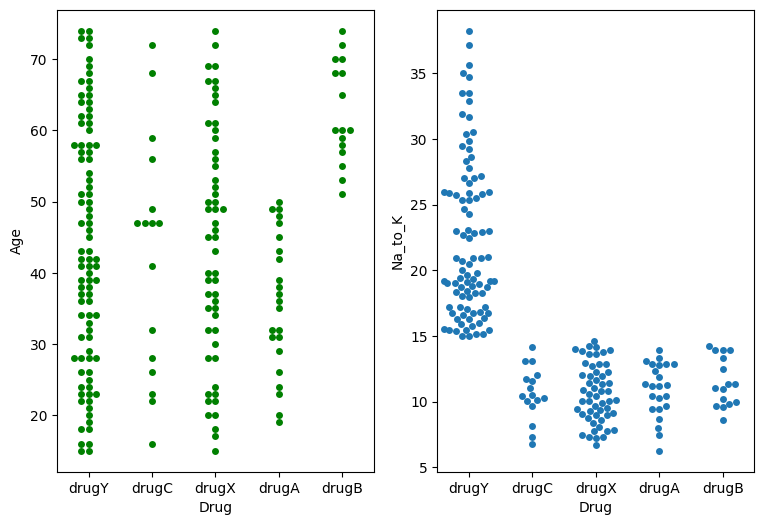

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(9,6))
sns.swarmplot(ax=axes[0], x = "Drug", y = 'Age', data = df_drug, color = "green")
# plt.legend(df_drug['Drug'].value_counts().index)
sns.swarmplot(ax=axes[1], x = "Drug", y = "Na_to_K", data = df_drug)
# plt.legend(df_drug['Drug'].value_counts().index)

* Na_to_K >= 15 -> Using drug Y
* Na_to_K < 15 -> Using drug A/B/C/X
* Drug B is used by the age > 50
* In contrast, drug A is used by age < 50

# Data binning

In [12]:
min_value = df_drug['Age'].min()
max_value = df_drug['Age'].max()

In [13]:
binA = [0, 19, 29, 39, 49, 59, 69, 80]
labelA = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '>=70']
df_drug['Age_binned'] = pd.cut(df_drug['Age'], bins = binA, labels= labelA)

In [14]:
df_drug_new = df_drug.drop(['Age'], axis = 1)

In [15]:
X = df_drug_new.drop(["Drug"], axis = 1)
y = df_drug_new["Drug"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### One-hot Encoder

In [17]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [18]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
X_train_after, y_train_after = SMOTE().fit_resample(X_train, y_train)

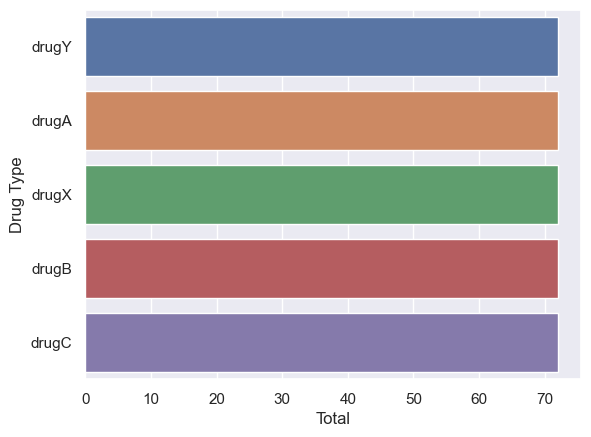

In [19]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train_after)
sns.color_palette("husl", 8)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

## Models

### Logistic Regression

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn import naive_bayes, neighbors, svm

In [21]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=200)
LRclassifier.fit(X_train_after, y_train_after)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       drugA       0.75      1.00      0.86         3
       drugB       1.00      1.00      1.00         1
       drugC       0.75      1.00      0.86         3
       drugX       1.00      0.93      0.96        14
       drugY       0.94      0.89      0.92        19

    accuracy                           0.93        40
   macro avg       0.89      0.96      0.92        40
weighted avg       0.94      0.93      0.93        40

[[ 3  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 13  1]
 [ 1  0  1  0 17]]
Logistic Regression accuracy is: 92.50%


C:\Users\ad min\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         1
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        14
       drugY       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[ 3  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 19]]
Accuracy: 100.0 %


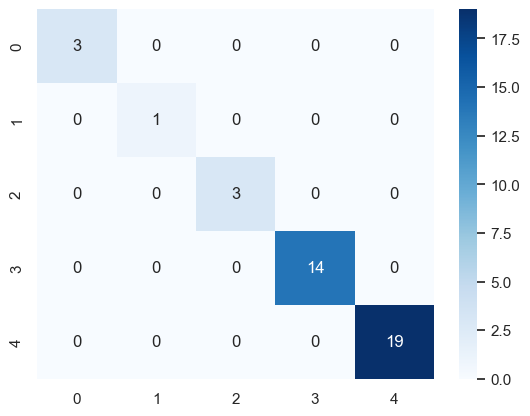

In [22]:
svc_model = svm.SVC(kernel='linear', max_iter = 200)
svc_model.fit(X_train_after, y_train_after)
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
print(f"Accuracy:", accuracy_score(y_pred, y_test)*100, "%")

### CNB

In [40]:
from sklearn.naive_bayes import CategoricalNB
CNB = CategoricalNB()
CNB.fit(X_train_after, y_train_after)

y_pred = CNB.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
CNBAcc = accuracy_score(y_pred,y_test)
print('Categorical NB accuracy is: {:.2f}%'.format(CNBAcc*100))

              precision    recall  f1-score   support

       drugA       0.60      1.00      0.75         3
       drugB       0.33      1.00      0.50         1
       drugC       0.60      1.00      0.75         3
       drugX       0.93      1.00      0.97        14
       drugY       1.00      0.63      0.77        19

    accuracy                           0.82        40
   macro avg       0.69      0.93      0.75        40
weighted avg       0.90      0.82      0.83        40

[[ 3  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 14  0]
 [ 2  2  2  1 12]]
Categorical NB accuracy is: 82.50%


### GNB

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train_after, y_train_after).predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
NB1 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NB1*100))

              precision    recall  f1-score   support

       drugA       0.43      1.00      0.60         3
       drugB       0.50      1.00      0.67         1
       drugC       0.50      1.00      0.67         3
       drugX       0.78      1.00      0.88        14
       drugY       1.00      0.37      0.54        19

    accuracy                           0.70        40
   macro avg       0.64      0.87      0.67        40
weighted avg       0.83      0.70      0.67        40

[[ 3  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 14  0]
 [ 4  1  3  4  7]]
Gaussian Naive Bayes accuracy is: 70.00%


### KNN

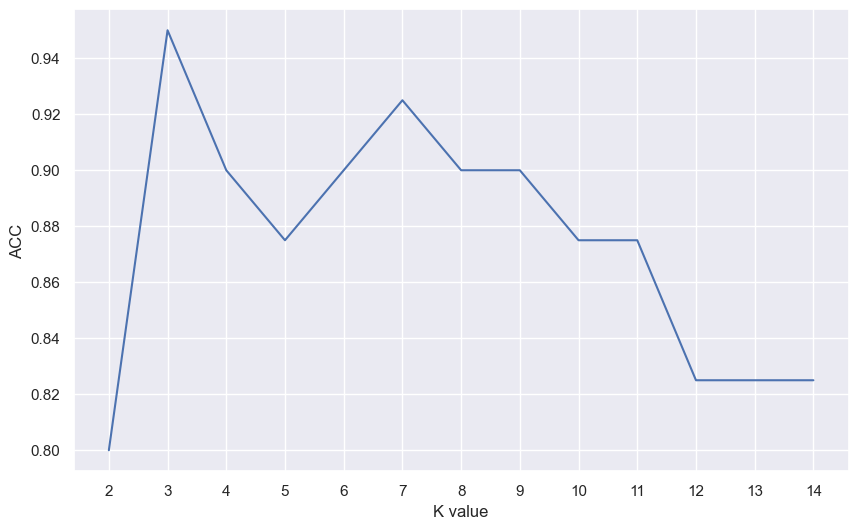


 Accuracy (None k-fold): 95.0 %
With n_neighbors (None k-fold): 3


In [47]:
knn_list = []
for i in range(2,15):
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    knn_acc = knn.score(X_test , y_test)
    knn_list.append(knn_acc)
plt.figure(figsize=(10,6))
plt.plot(range(2,15), knn_list)
plt.xticks(np.arange(2,15,1))
plt.xlabel("K value")
plt.ylabel("ACC")
plt.show()
KNAccMax = max(knn_list)
print('\n Accuracy (None k-fold):', (KNAccMax*100).round(2), '%')
print("With n_neighbors (None k-fold):", knn_list.index(KNAccMax)+2)

### SGD

In [35]:
from sklearn.linear_model import SGDClassifier

In [39]:
sgd = SGDClassifier( max_iter=500, tol = 1e-3)
sgd.fit(X_train_after, y_train_after)

y_pred = sgd.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SGDAcc = accuracy_score(y_pred,y_test)
print('SGD accuracy is: {:.2f}%'.format(SGDAcc*100))

              precision    recall  f1-score   support

       drugA       0.75      1.00      0.86         3
       drugB       1.00      1.00      1.00         1
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        14
       drugY       1.00      0.95      0.97        19

    accuracy                           0.97        40
   macro avg       0.95      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40

[[ 3  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 14  0]
 [ 1  0  0  0 18]]
SGD accuracy is: 97.50%


### Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
gb = GradientBoostingClassifier()
gb.fit(X_train_after, y_train_after)

y_pred = gb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('GB accuracy is: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         1
       drugC       1.00      0.67      0.80         3
       drugX       0.93      1.00      0.97        14
       drugY       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.99      0.93      0.95        40
weighted avg       0.98      0.97      0.97        40

[[ 3  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  2  1  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 19]]
GB accuracy is: 97.50%


## k-fold cross validation

In [2]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [23]:
X_k = X_train
y_k = y_train

In [24]:
kf1 = KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index1, test_index1 in kf1.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index1)}, Valid set:{len(test_index1)}')
    cnt += 1

Fold:1, Train set: 128, Valid set:32
Fold:2, Train set: 128, Valid set:32
Fold:3, Train set: 128, Valid set:32
Fold:4, Train set: 128, Valid set:32
Fold:5, Train set: 128, Valid set:32


### LoR

In [26]:
score3 = cross_val_score(LogisticRegression(solver='liblinear', max_iter=200), X_train, y_train, cv= kf1, scoring="accuracy")
print(f'Scores for each fold are: {score3.round(4)*100}')
print(f'Average score: {"{:.2f}".format(score3.mean()*100)}',"%")

Scores for each fold are: [ 87.5   84.38  93.75  81.25 100.  ]
Average score: 89.38 %


### SVM

In [59]:
score_edit = cross_val_score(svm.SVC(random_state= 0, max_iter = 250), X_train, y_train, cv= kf1, scoring="accuracy")
print(f'Scores for each fold are: {score_edit.round(4)*100}')
print(f'Average score: {"{:.2f}".format(score_edit.mean()*100)}', "%")

Scores for each fold are: [62.5  56.25 68.75 71.88 78.12]
Average score: 67.50 %


### GNB

In [60]:
from sklearn.naive_bayes import GaussianNB
score1_edit = cross_val_score(GaussianNB(), X_train, y_train, cv= kf1, scoring="accuracy")
print(f'Scores for each fold are: {score1_edit.round(4)*100}')
print(f'Average score: {"{:.2f}".format(score1_edit.mean()*100)}',"%")

Scores for each fold are: [65.62 62.5  65.62 75.   59.38]
Average score: 65.62 %


In [61]:
score_editSGD = cross_val_score(SGDClassifier(max_iter = 200, tol = 1e-3), X_train, y_train, cv= kf1, scoring="accuracy")
print(f'Scores for each fold are: {score_editSGD.round(4)*100}')
print(f'Average score: {"{:.2f}".format(score_editSGD.mean()*100)}', "%")

Scores for each fold are: [81.25 81.25 93.75 78.12 87.5 ]
Average score: 84.38 %
